In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io, color, exposure, transform, img_as_float32
import skimage

from pathlib import Path

# Import normal peripheral blood cell dataset

In [2]:
path_name = '../../data/PBC_dataset_normal_df_resize_luminance.csv'
path = Path(path_name)
df = pd.read_csv(path_name)
df.head()

,img_paths,id,label,height,width,mean_brightness,mean_luminance
0,../../data/PBC_dataset_normal_DIB/monocyte/MO_...,225079,MO,363,360,196.225564,0.756902
1,../../data/PBC_dataset_normal_DIB/monocyte/MO_...,582430,MO,363,360,196.672727,0.757366
2,../../data/PBC_dataset_normal_DIB/monocyte/MO_...,436409,MO,363,360,204.348235,0.797640
3,../../data/PBC_dataset_normal_DIB/monocyte/MO_...,648815,MO,363,360,199.038259,0.770929
4,../../data/PBC_dataset_normal_DIB/monocyte/MO_...,668574,MO,363,360,191.020018,0.734784


In [3]:
classes = df['label'].unique()
classes

array(['MO', 'ERB', 'PLATELET', 'BA', 'IG', 'SNE', 'LY', 'EO'],
      dtype=object)

## Import images and store as an array of array

In [6]:
df.img_paths[0]

'../../data/PBC_dataset_normal_DIB/monocyte/MO_225079.jpg'

In [4]:
def load_image_as_grey_same_size(filename):
    image = skimage.io.imread(filename, as_gray=True)
    image = transform.resize(image, (363, 360))
    image = img_as_float32(image)  # Optional: set to your desired precision
    return image

In [8]:
np.array(df.img_paths[0])

array('../../data/PBC_dataset_normal_DIB/monocyte/MO_225079.jpg',
      dtype='<U56')

In [9]:
np.array(load_image_as_grey_same_size(df.img_paths[0]))

array([[0.81319135, 0.7899447 , 0.7557588 , ..., 0.71431017, 0.70646703,
        0.703111  ],
       [0.84064233, 0.8173957 , 0.7893714 , ..., 0.7103886 , 0.70646703,
        0.6991894 ],
       [0.8714494 , 0.8563286 , 0.8280216 , ..., 0.70646703, 0.70254546,
        0.69526786],
       ...,
       [0.7016745 , 0.69551295, 0.6924396 , ..., 0.8162569 , 0.8123353 ,
        0.80841374],
       [0.7016745 , 0.69551295, 0.6924396 , ..., 0.8162569 , 0.8123353 ,
        0.80841374],
       [0.7016745 , 0.69551295, 0.6924396 , ..., 0.8162569 , 0.8123353 ,
        0.80841374]], dtype=float32)

In [10]:
%time
images = np.array([load_image_as_grey_same_size(file) for file in df['img_paths']])

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 10.7 µs


In [11]:
pd.Series([im.shape for im in images]).unique()

array([(363, 360)], dtype=object)

In [21]:
# image_tosave = np.array(images)

# np.savez_compressed(Path('../../data/images_np/PBC_dataset_normal'), np.array(image_tosave), allow_pickle=True)

# images = np.load(Path('../../data/images_np/PBC_dataset_normal.npz'),allow_pickle=True)

In [13]:
images.shape

(17092, 363, 360)

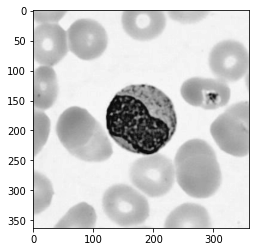

In [15]:
i = np.random.randint(0,len(df))
plt.imshow(images[i], cmap='gray')

# Analysis of brightness/luminance

In [16]:
def plot_gray(idx, plot_gray=False):
    
    gray = images[idx]
    histo, histo_centers = exposure.histogram(gray)
    
    fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

    if plot_gray:
        ax[0].imshow(gray, cmap='gray')
    else: ax[0].imshow(im)

    ax[1].plot(histo_centers, histo, lw=2)
    ax[1].set_title('Gray-level histogram')
    plt.xlim([0, 1])

    plt.suptitle(df.loc[idx]['label'])
    plt.tight_layout()
    plt.show()
    return gray, histo, histo_centers, fig

Here is an example of gray value analysis

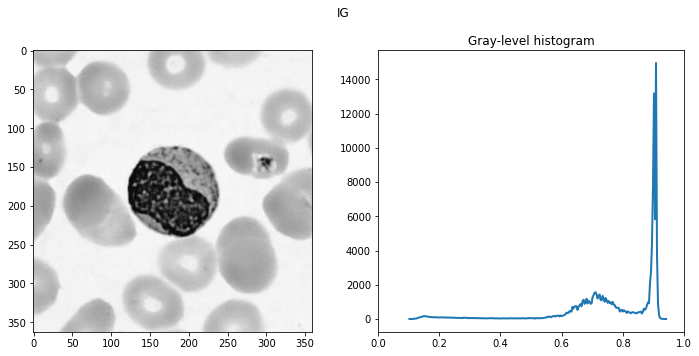

In [40]:
gray_test, histo, histo_centers, fig = plot_gray(i, plot_gray=True) # normalised

## Mean luminance calcul

In [66]:
df['mean_luminance'] = [np.mean(im) for im in images]
# df.to_csv('../../data/PBC_dataset_normal_df_resize_luminance.csv', index=False)

<AxesSubplot:xlabel='mean_luminance', ylabel='Density'>

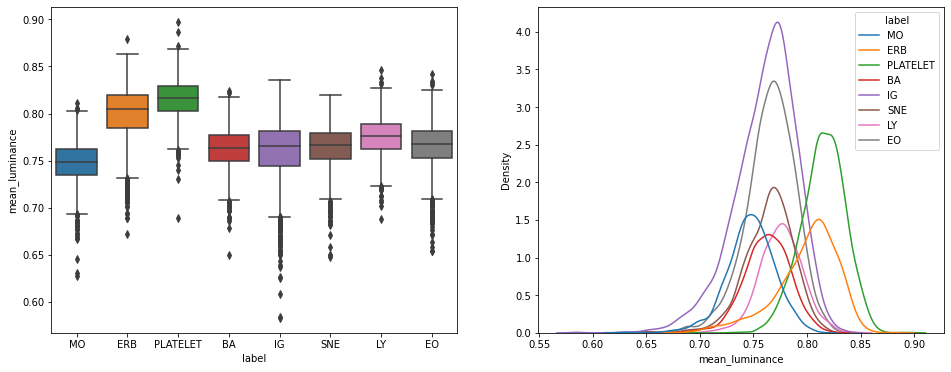

In [26]:
plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
sns.boxplot(x = "label", y = "mean_luminance", data = df)

plt.subplot(1,2,2)
sns.kdeplot(x = "mean_luminance", hue = "label", data = df)

Let's look at the two most extreme outliers

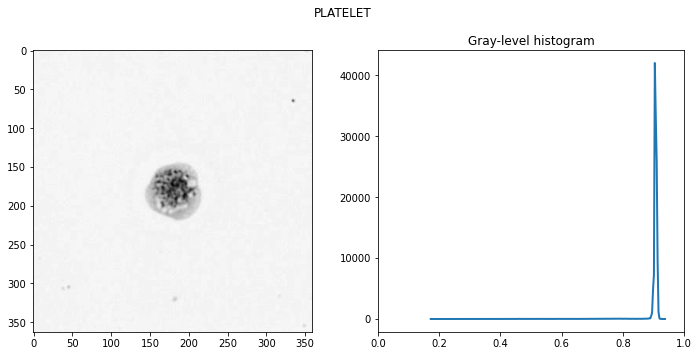

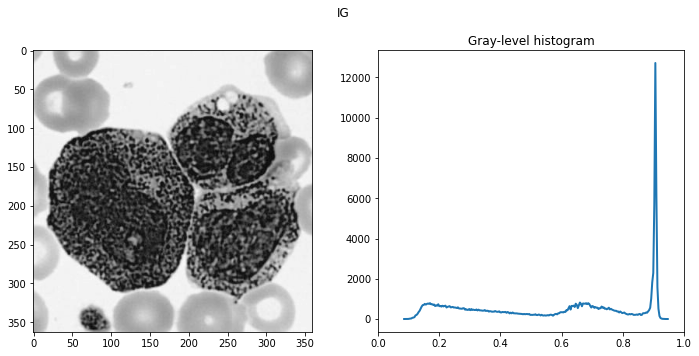

In [72]:
gray_test, histo, histo_centers, fig = plot_gray(df.mean_luminance.argmax(), plot_gray=True) 
gray_test, histo, histo_centers, fig = plot_gray(df.mean_luminance.argmin(), plot_gray=True) 

## Mean gray per cell

In [109]:
def plot_mean_gray_per_cell(label):
    
    temp_df =  df[df.label == label]
    temp_images = images[temp_df.index]
    mean_exp = np.array([exposure.histogram(im) for im in temp_images])   
   
    fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

    
    ax[0].imshow(temp_images.mean(axis=0), cmap='cividis_r')

    ax[1].plot(mean_exp.mean(axis=0)[1], mean_exp.mean(axis=0)[0])
    ax[1].set_title('Gray-level histogram')
    plt.xlim([0, 1])

    plt.suptitle(f'mean gray value for {label}')
    plt.tight_layout()
    plt.show()
    return mean_exp

#TO DO include sd

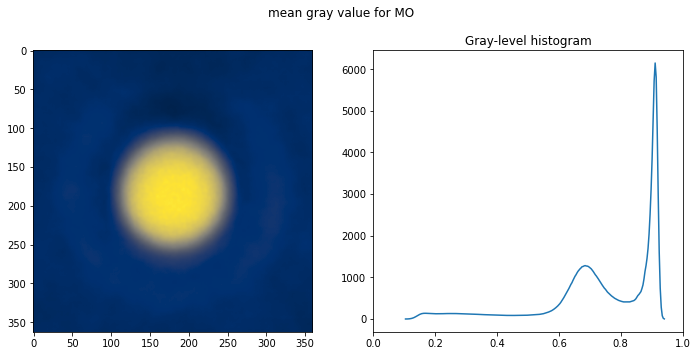

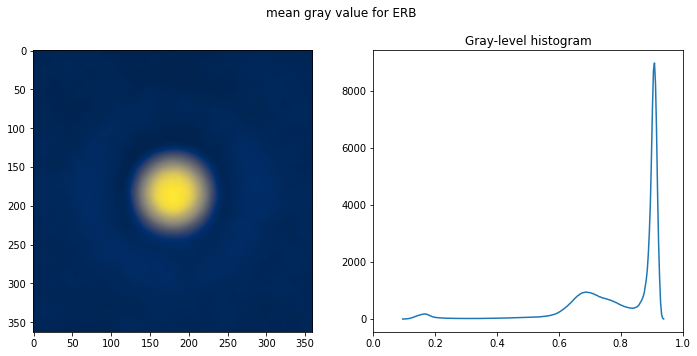

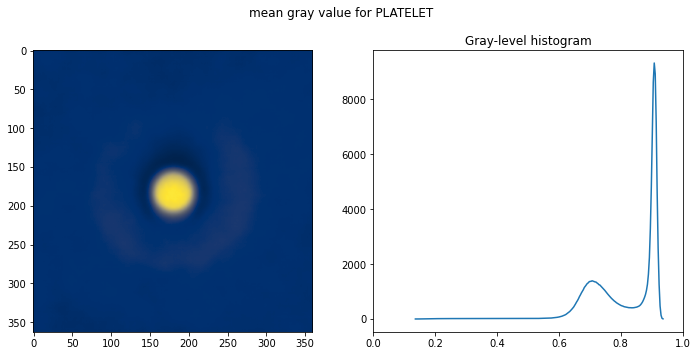

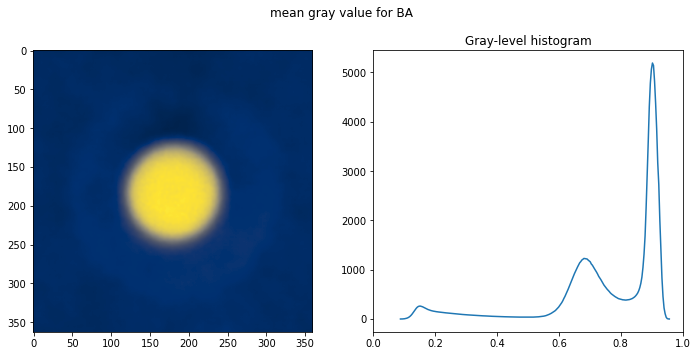

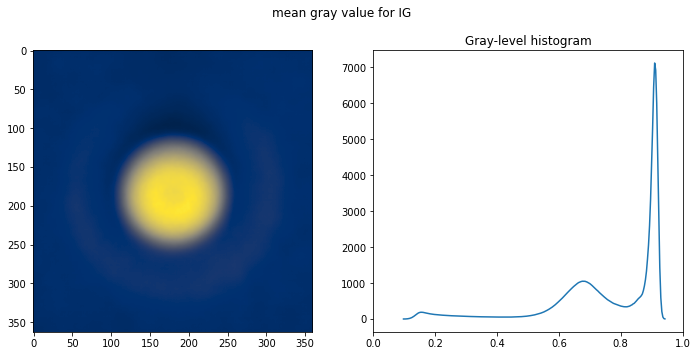

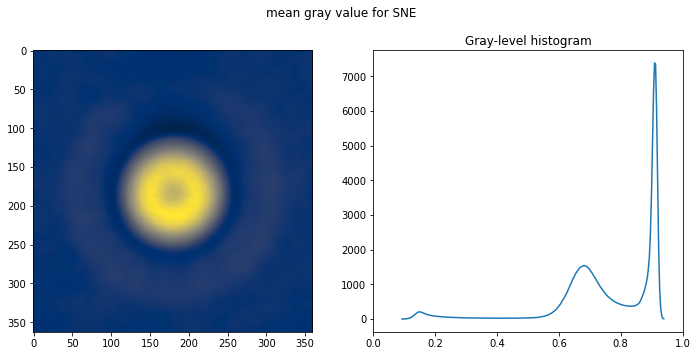

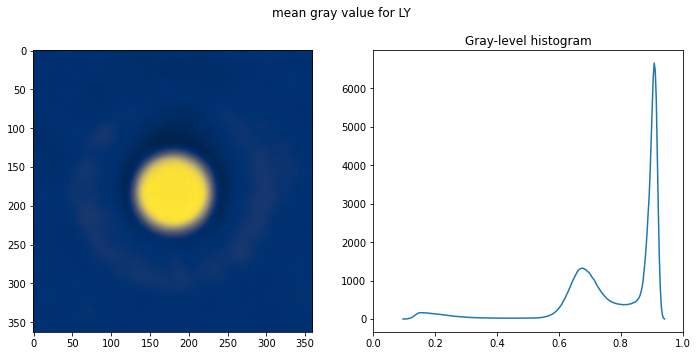

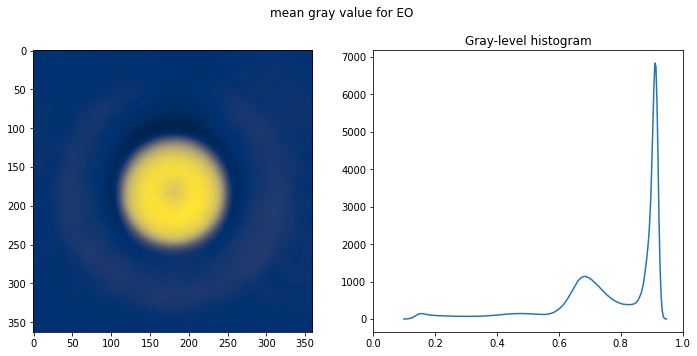

In [110]:
for cell in df.label.unique():
    plot_mean_gray_per_cell(cell)